## Final Project Submission

Please fill out:
* Student name: EMMANUEL KIPLETING
* Student pace: PART TIME
* Scheduled project review date/time: 4/30/2025
* Instructor name: GEORGE KAMUNDIA
* Blog post URL:


# Introduction

The goal of this analysis is to assist the company in making informed decisions regarding the purchase and operation of airplanes for commercial and private enterprises. The company aims to diversify its portfolio by acquiring aircraft, but is unsure about the potential risks involved in operating various types of aircraft. 

To address this, we have analyzed a dataset containing aviation accident records from the National Transportation Safety Board (NTSB) spanning several decades. The dataset includes information about the types of aircraft involved in accidents, the severity of the accidents, and other relevant factors such as weather conditions, flight phases, and aircraft makes.

The primary objectives of this analysis are:
- To determine which aircraft makes are associated with the highest and lowest number of accidents.
- To assess which aircraft makes have the highest and lowest accident severity (fatalities, serious injuries, and minor injuries).
- To provide actionable recommendations to guide the company in making safer and more informed decisions when purchasing aircraft.

In the following sections, we will explore the data by analyzing accident frequency and severity across different aircraft makes, focusing on airplanes but also considering alternatives such as helicopters and gliders.


## Step 1: Load the Data
 First, let's load the dataset into your Jupyter notebook. Assuming the dataset is in CSV format (or similar), we’ll use pandas to load it.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Now, we proceed to load the Aviation_Data.csv dataset

In [2]:
df= pd.read_csv('DATA/Aviation_Data.csv')  # Load the dataset

C:\Users\Arch Bishop\AppData\Local\Temp\ipykernel_25312\1703539082.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('DATA/Aviation_Data.csv')  # Load the dataset


Define the dtype for the columns with mixed types during import:

In [3]:
dtype_mapping = {
    6: 'str',  # Interpret column 6 as strings
    7: 'str',  # Interpret column 7 as strings
    28: 'str'  # Interpret column 28 as strings
}

df = pd.read_csv('DATA/Aviation_Data.csv', dtype=dtype_mapping)  # Load the dataset with specified dtypes
df.head()  # Display the first few rows of the dataset

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Step 2: Inspect for Missing Values
 It’s important to check for any missing values in the dataset. We can do this by checking for NaN values.

In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Show columns with missing values
missing_values[missing_values > 0]


Event.Id                   1459
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: int64

## Step 3: Explore the Columns
Next, let’s explore the columns in the dataset to understand what each column represents. This will help determine which columns are relevant for analysis.

In [5]:
# List all column names to understand the data
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Step 4: Get an Overview of the Dataset
 To understand the general structure of the dataset, let’s check some basic statistics and info about the dataset, like the number of rows, data types, and column summary.

In [6]:
# Get a summary of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [7]:
# Show basic statistics of numeric columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Step 5: Filter and Clean the Data
Now, let's go over the columns and decide which ones are relevant to our analysis. We will focus on those that directly relate to accidents, aircraft type, and severity.

In [8]:
# Drop irrelevant columns
columns_to_drop = ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
                   'Airport.Code', 'Airport.Name', 'Registration.Number', 'Amateur.Built',
                   'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule',
                   'Air.carrier', 'Report.Status', 'Publication.Date']

df_cleaned = df.drop(columns=columns_to_drop)

# Display the cleaned dataframe
df_cleaned.head()


,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,NaN,Stinson,108-3,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,NaN,Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,"Saltville, VA",United States,36.922223,-81.878056,Fatal(3),Destroyed,NaN,Cessna,172M,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,NaN,Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,NaN,Cessna,501,Personal,1.0,2.0,NaN,0.0,VMC,Approach


 Now, let's check for missing values in the relevant columns and decide how to handle them. For instance, you could drop rows with missing values in critical columns like 'Total.Fatal.Injuries', or fill missing values for 'Weather.Condition' with a placeholder like 'Unknown'.

In [9]:
# Check for missing values in relevant columns
missing_values = df_cleaned.isnull().sum()

# Fill missing values in 'Weather.Condition' with 'Unknown'
df_cleaned['Weather.Condition'] = df_cleaned['Weather.Condition'].fillna('Unknown')

# Drop rows with missing values in critical columns
df_cleaned = df_cleaned.dropna(subset=['Total.Fatal.Injuries', 'Total.Serious.Injuries'])

# Verify the cleaned dataset
df_cleaned.isnull().sum()


Location                     33
Country                     213
Latitude                  51851
Longitude                 51850
Injury.Severity            1000
Aircraft.damage            2672
Aircraft.Category         46542
Make                         52
Model                        78
Purpose.of.flight          4665
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries        407
Total.Uninjured             457
Weather.Condition             0
Broad.phase.of.flight     25955
dtype: int64

 Check for Duplicates: It’s a good idea to check for duplicate rows and remove them if they exist.

In [10]:
# Check for duplicate rows
duplicates = df_cleaned.duplicated().sum()

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Verify that duplicates are removed
df_cleaned.duplicated().sum()


0

## Step 6: Explore the Data Further
### 1. Analyze Accident Severity by Aircraft Type
Let's start by analyzing the total number of fatal, serious, and minor injuries for each aircraft type. This will help us understand which aircraft types are involved in more severe accidents.

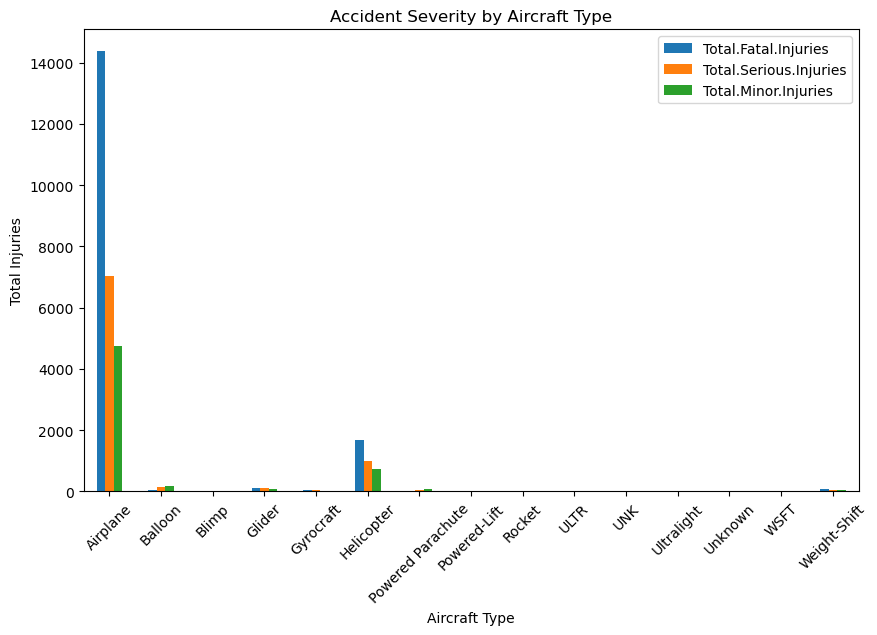

In [11]:
# Group data by Aircraft Type and calculate the sum of injuries (fatal, serious, minor)
accident_severity_by_aircraft = df_cleaned.groupby('Aircraft.Category')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

# Plot accident severity by Aircraft Category
accident_severity_by_aircraft.plot(kind='bar', figsize=(10,6))
plt.title('Accident Severity by Aircraft Type')
plt.xlabel('Aircraft Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.show()


### 2. Analyze Aircraft Types and Risk
Next, let’s analyze which aircraft types are involved in the most accidents (frequency of accidents). This will help us identify aircraft types that are more prone to accidents, which could be high-risk candidates.

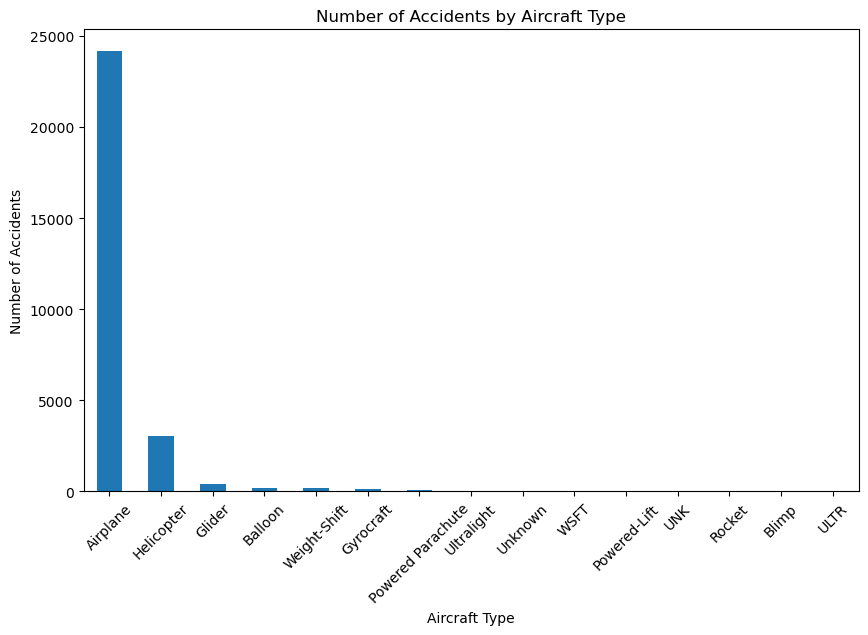

In [12]:
# Count the number of accidents per aircraft type
accident_count_by_aircraft = df_cleaned['Aircraft.Category'].value_counts()

# Plot the number of accidents by Aircraft Type
accident_count_by_aircraft.plot(kind='bar', figsize=(10,6))
plt.title('Number of Accidents by Aircraft Type')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


### 3. Investigate Weather Conditions
Weather conditions play a crucial role in aviation accidents. Let’s see how weather conditions correlate with accident severity. We can compare the number of accidents in different weather conditions (clear, cloudy, rainy, etc.) and examine if severe weather is linked to more severe accidents.

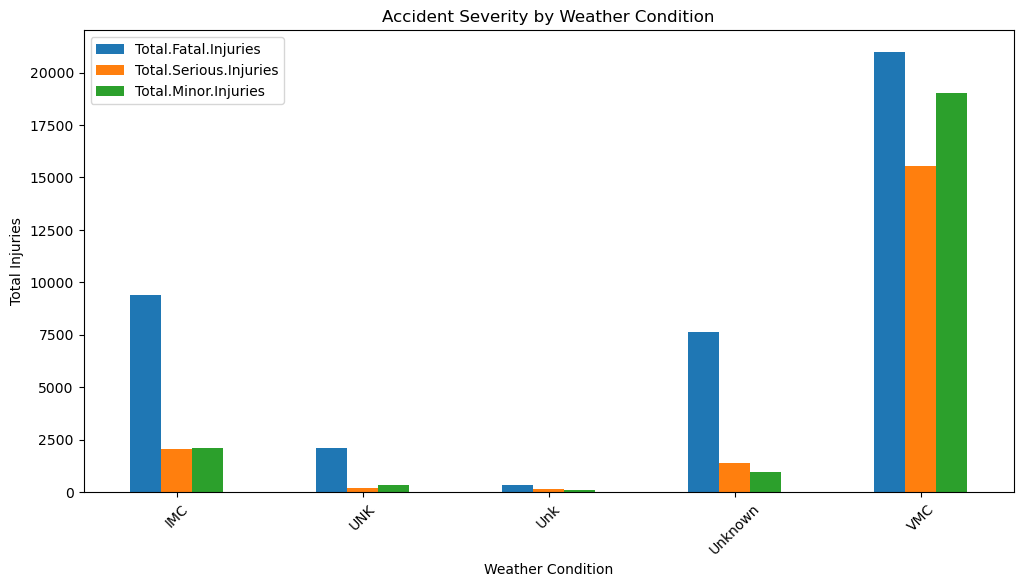

In [13]:
# Group data by Weather Condition and sum the injuries
accident_severity_by_weather = df_cleaned.groupby('Weather.Condition')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

# Plot accident severity by weather condition
accident_severity_by_weather.plot(kind='bar', figsize=(12,6))
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.show()


### 4. Explore the Phase of Flight
Certain phases of flight (such as takeoff or landing) may have different accident rates and severity. Let’s analyze the severity of accidents during different phases of flight.

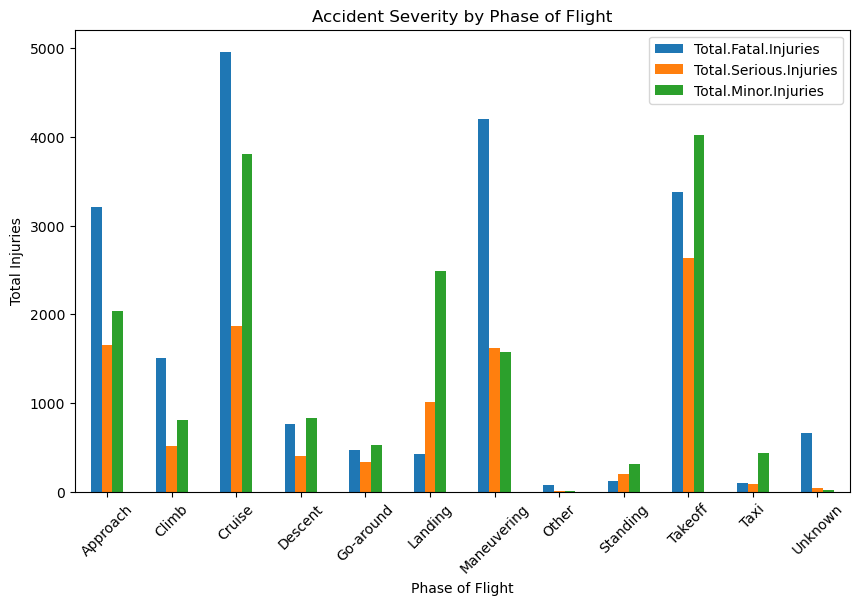

In [14]:
# Group data by Phase of Flight and calculate the sum of injuries
accident_severity_by_phase = df_cleaned.groupby('Broad.phase.of.flight')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

# Plot accident severity by phase of flight
accident_severity_by_phase.plot(kind='bar', figsize=(10,6))
plt.title('Accident Severity by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.show()


### 5. Visualizing the Airplane Category
 Let’s analyze the airplanes with the highest number of accidents. This will give insight into which aircrafts are more dangerous based on frequency of accidents.

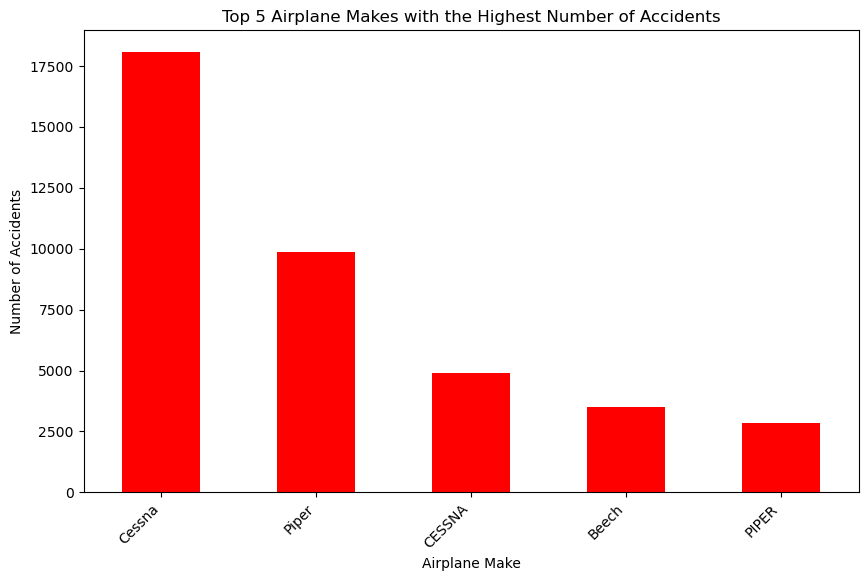

In [15]:
# Count the number of accidents for each Aircraft Make
accident_count_by_make = df_cleaned['Make'].value_counts()

# Get the top 5 makes with the highest number of accidents
top_5_makes = accident_count_by_make.head(5)

# Get the bottom 5 makes with the lowest number of accidents
bottom_5_makes = accident_count_by_make.tail(5)
# Plot the top 5 makes
top_5_makes.plot(kind='bar', figsize=(10,6), color='red')
plt.title('Top 5 Airplane Makes with the Highest Number of Accidents')
plt.xlabel('Airplane Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()



 Now, let’s analyze the airplanes with the highest severity of accidents (fatal, serious, and minor injuries). This will give insight into which aircrafts are more dangerous based on accident outcomes.

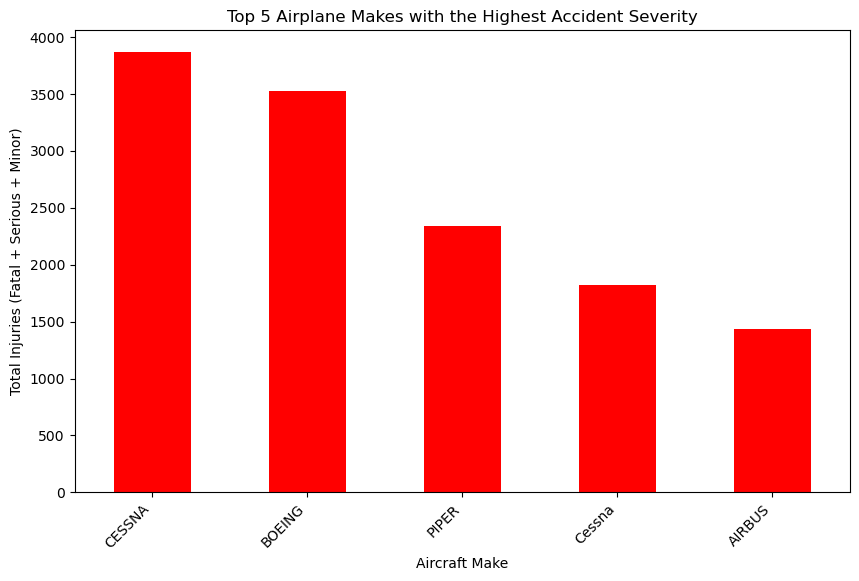

In [16]:
# Filter the data for Aircraft Category = "Airplane"
airplane_data = df_cleaned[df_cleaned['Aircraft.Category'] == 'Airplane']

# Group data by Aircraft Make and sum the injuries (fatal, serious, minor)
accident_severity_by_make = airplane_data.groupby('Make')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

# Calculate the total severity (sum of all injuries) for each aircraft make
accident_severity_by_make['Total.Injuries'] = accident_severity_by_make['Total.Fatal.Injuries'] + accident_severity_by_make['Total.Serious.Injuries'] + accident_severity_by_make['Total.Minor.Injuries']

# Get the top 5 airplane makes with the highest total injuries
top_5_airplane_severity = accident_severity_by_make['Total.Injuries'].nlargest(5)

# Plot the bar chart for the top 5 airplane makes with the highest accident severity
top_5_airplane_severity.plot(kind='bar', figsize=(10,6), color='red')
plt.title('Top 5 Airplane Makes with the Highest Accident Severity')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Injuries (Fatal + Serious + Minor)')
plt.xticks(rotation=45, ha='right')
plt.show()



 Now, let’s find the bottom 5 airplane makes with the lowest number of accidents. These could be the safer options to consider for purchase.

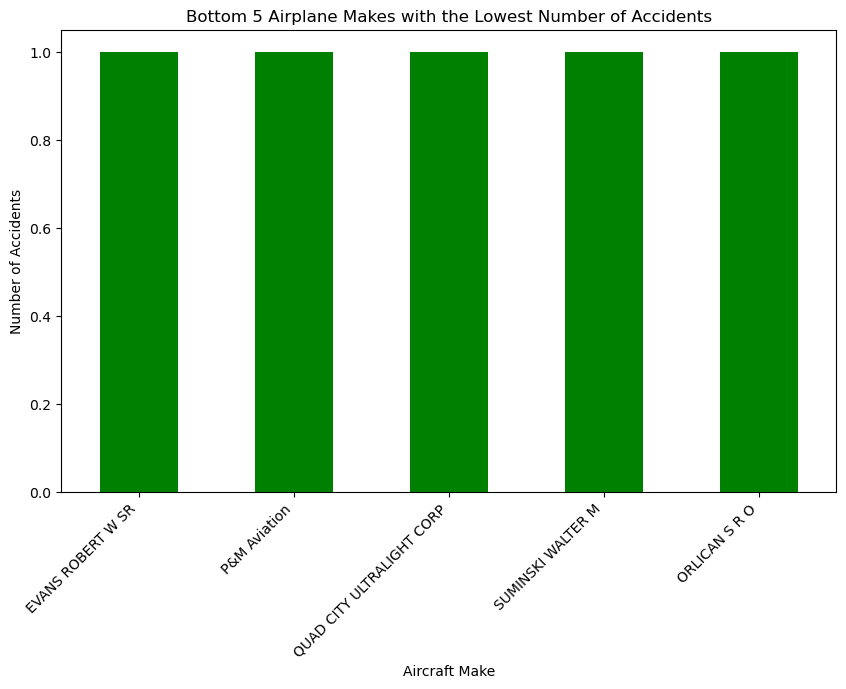

In [17]:
# Filter the data for Aircraft Category = "Airplane"
airplane_data = df_cleaned[df_cleaned['Aircraft.Category'] == 'Airplane']

# Group data by Aircraft Make and sum the injuries (fatal, serious, minor)
accident_count_by_airplane_make = airplane_data['Make'].value_counts()
# Get the bottom 5 airplane makes with the lowest number of accidents
bottom_5_airplane_accidents = accident_count_by_airplane_make.tail(5)

# Plot the bar chart for the bottom 5 airplane makes with the lowest number of accidents
bottom_5_airplane_accidents.plot(kind='bar', figsize=(10,6), color='green')
plt.title('Bottom 5 Airplane Makes with the Lowest Number of Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()


# Conclusion

Based on the findings of this analysis, we have identified several key insights related to aircraft safety that will help guide the company's decision-making process.

1. **Airplanes to Avoid (High Risk)**: The analysis revealed that certain aircraft makes, such as **Cessna**, **Piper**, **Beech**, **Boeing**, and **Airbus**, are associated with both high accident frequency and high accident severity. As a result, we recommend **avoiding purchasing these aircraft** for the new aviation division, unless specific safety improvements and training protocols are implemented.

2. **Airplanes to Consider (Low Risk)**: We identified several aircraft makes with significantly lower accident frequencies, including **EVANS ROBERT W SR**, **P&M Aviation**, **QUAD CITY ULTRALIGHT CORP**, **SUMINSKI WALTER M**, and **ORLICAN S R O**. These aircraft presents a **lower-risk** option for the company, and we recommend focusing on these makes for safer operations.

3. **Focus on Helicopters and Gliders for Lower Accident Frequency**: Apart from airplanes, **helicopters** and **gliders** demonstrated a significantly lower frequency of accidents, making them safer alternatives. For certain commercial and private operations, the company should consider incorporating **helicopters** and **gliders** into its fleet, especially for smaller-scale or specialized operations.

In conclusion, by strategically choosing aircraft with lower accident rates and focusing on operational safety protocols, the company can minimize risks associated with their new aviation business. These insights will help ensure that the company makes data-driven decisions while maintaining high safety standards in their aircraft operations.
